# **notebook_02: Veri Görselleştirme**

**1. Rol & Amaç**

Bu notebook’ta, Notebook_01’de temizlenmiş ve hazırlanmış veriler kullanılarak enerji perakende sektörüne ait tahakkuk ve tahsilat verilerine ait karşılaştırmalı ve açıklayıcı görselleştirmeler yapılmıştır.

Amaç:
- İlçeler arası tüketim ve müşteri yapısındaki farkları görselleştirmek
- Mevsimsel tüketim trendlerini analiz etmek
- Tahsilat ve ödeme davranışlarını karşılaştırmalı olarak incelemek
- Veriden çıkan içgörüleri sade ve profesyonel grafiklerle aktarmaktır

Bu çalışmada:
- Tüketim analizleri yalnızca tahakkuk verisi bulunan ilçelerle sınırlıdır
- Tahsilat analizleri, tahsilat verisinin kapsadığı tüm ilçeleri içermektedir

**2. Kütüphanelerin ve Verilerin Yüklenmesi**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_tahakkuk_all = pd.read_pickle("tahakkuk_clean.pkl")
df_tahsilat = pd.read_pickle("tahsilat_clean.pkl")
df_tahsilat_1 = pd.read_pickle("tahsilat1_clean.pkl")

sns.set_theme(style="whitegrid",context="talk")

In [23]:
from pathlib import Path

OUT_DIR = Path("outputs/figures")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(filename: str, dpi: int = 300, close: bool = False):
    plt.tight_layout()
    plt.savefig(
        OUT_DIR / filename,
        dpi=dpi,
        bbox_inches="tight",
        facecolor="white",
        pad_inches=0.05
    )
    if close:
        plt.close()

**3.İlçe Bazlı Sınıf Dağılımı**

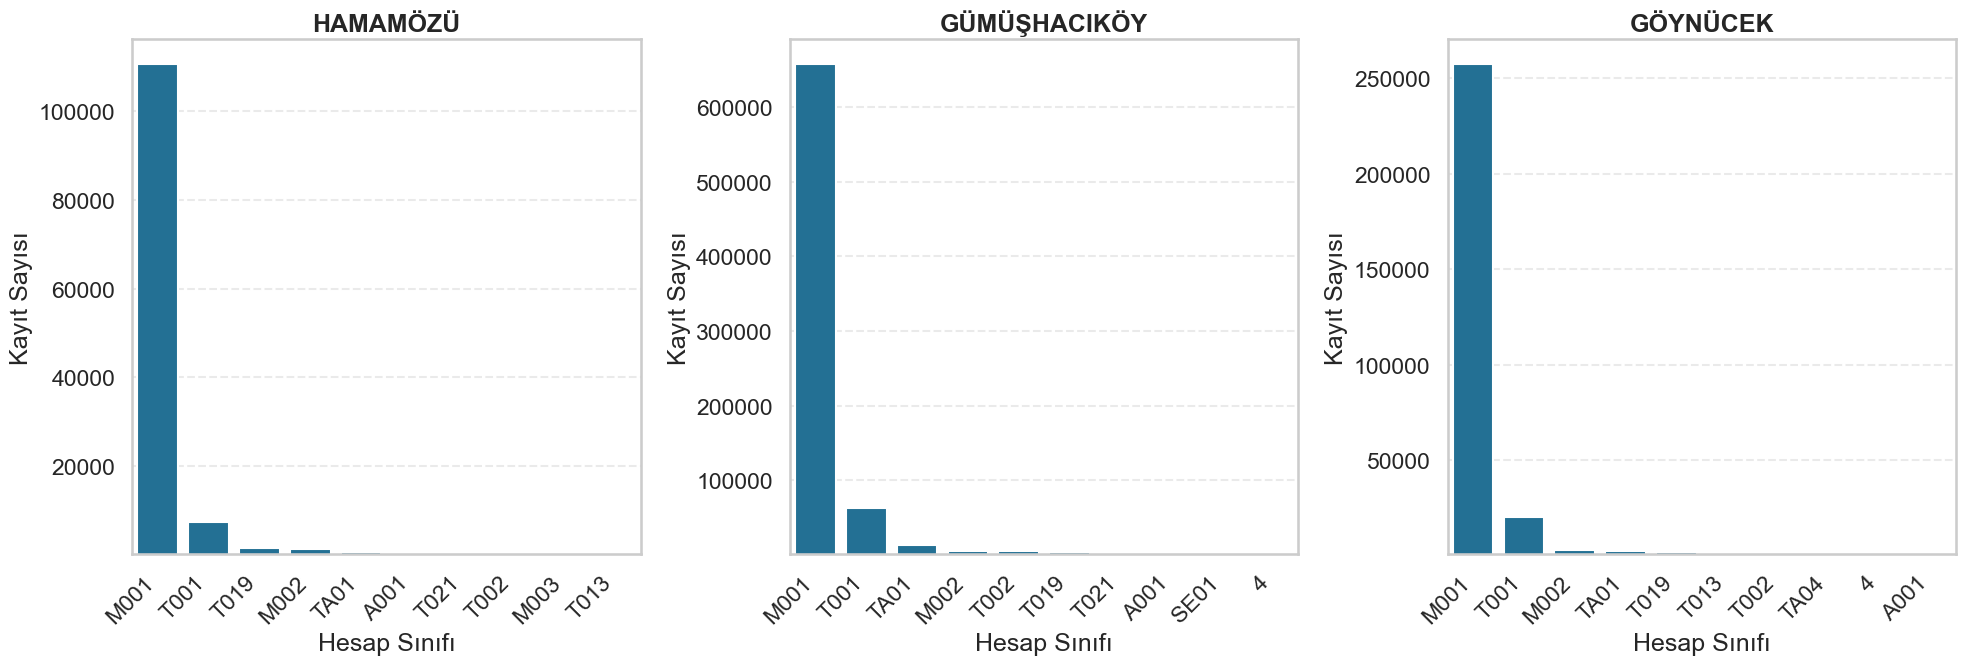

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

ilceler = ["HAMAMÖZÜ", "GÜMÜŞHACIKÖY", "GÖYNÜCEK"]

for ax, ilce in zip(axes, ilceler):

    data = df_tahakkuk_all[df_tahakkuk_all["ilce"] == ilce]

    counts = data["hesap_sinifi"].value_counts().head(10)

    sns.barplot(
        x=counts.index,
        y=counts.values,
        ax=ax,
        color="#1077A7"
    )
    
    ax.set_title(ilce, fontweight="bold")
    ax.set_xlabel("Hesap Sınıfı")
    ax.set_ylabel("Kayıt Sayısı")

    ax.tick_params(axis="x", rotation=45)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    min_y = counts.min() * 0.9
    max_y = counts.max() * 1.05
    ax.set_ylim(min_y, max_y)

    ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
save_fig("01_district_account_structure.png") 
plt.show()

İlçeler arasında baskın hesap sınıfları belirgin şekilde farklılaşmakta olup, bu durum tüketim profillerinin ilçe bazında ayrıştığını göstermektedir.

**4.Mevsimsel Tüketim Analizi**

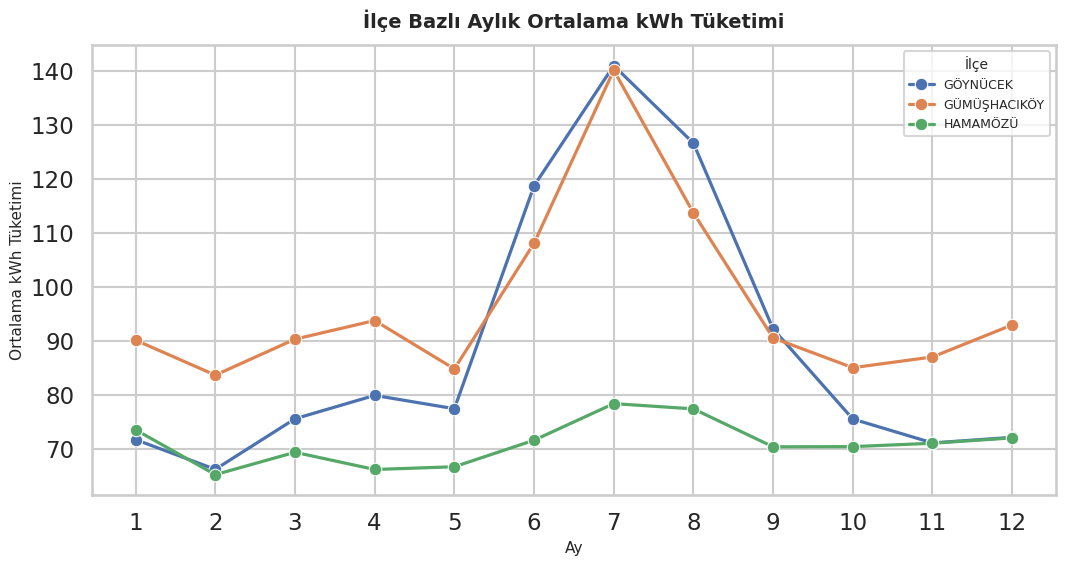

In [25]:
plt.rcParams["font.family"] = "DejaVu Sans"

df_tahakkuk_all["ay"] = df_tahakkuk_all["mali_yil_donem"].dt.month

monthly_avg = (
    df_tahakkuk_all
    .groupby(["ilce", "ay"])["kwh"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(11, 6))

sns.lineplot(
    data=monthly_avg,
    x="ay",
    y="kwh",
    hue="ilce",
    marker="o",
    linewidth=2.3
)

plt.title(
    "İlçe Bazlı Aylık Ortalama kWh Tüketimi",
    fontsize=14,
    fontweight="bold",
    pad=12
)

plt.xlabel("Ay", fontsize=11)
plt.ylabel("Ortalama kWh Tüketimi", fontsize=11)

plt.xticks(range(1, 13))  

plt.legend(
    title="İlçe",
    title_fontsize=10,
    fontsize=9,
    frameon=True
)

ax.grid(True, axis='y', linestyle='--', linewidth=0.8, alpha=0.3, zorder=0)
ax.set_axisbelow(True)

plt.tight_layout()
save_fig("02_monthly_consumption_trend.png")
plt.show()

Tüm ilçelerde yılın belirli aylarında tüketim artışlarının görülmesi, mevsimselliğin enerji talep planlamasında kritik bir faktör olduğunu ortaya koymaktadır.

**5.Tahsilat İlçe & Şube Dağılımları**

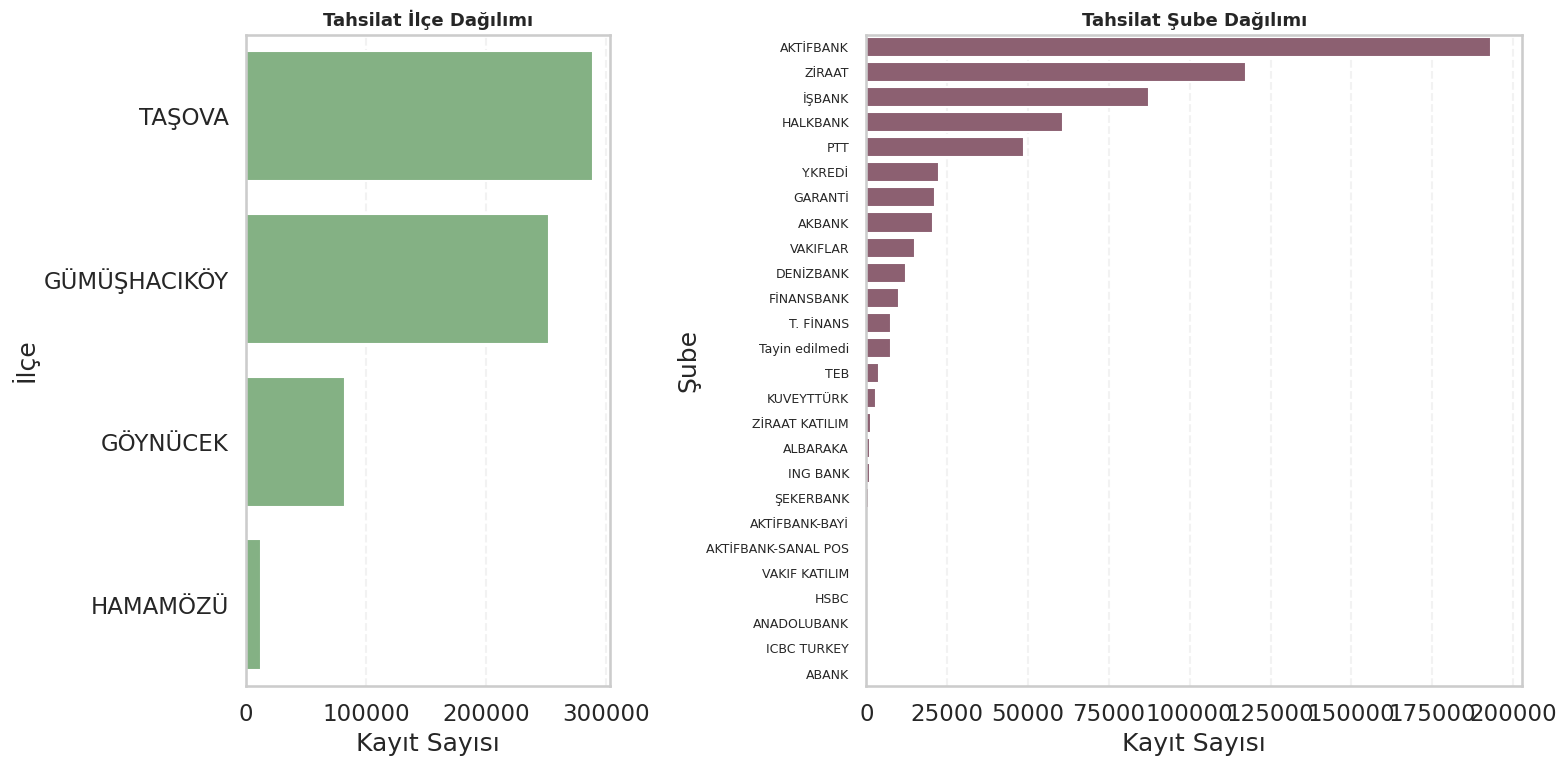

In [26]:
fig, axes = plt.subplots(
    1, 2,
    figsize=(16, 8),
    gridspec_kw={"width_ratios": [1, 1.8]}
)

ilce_counts = df_tahsilat["İlçe"].value_counts()

sns.barplot(
    y=ilce_counts.index,
    x=ilce_counts.values,
    ax=axes[0],
    color="#7CB87C"
)

axes[0].set_title("Tahsilat İlçe Dağılımı", fontweight="bold", fontsize=13)
axes[0].set_xlabel("Kayıt Sayısı")
axes[0].set_ylabel("İlçe")
axes[0].grid(axis="x", linestyle="--", alpha=0.25)

sube_counts = df_tahsilat["Şube"].value_counts()

sns.barplot(
    y=sube_counts.index,
    x=sube_counts.values,
    ax=axes[1],
    color="#93596F"
)

axes[1].set_title("Tahsilat Şube Dağılımı", fontweight="bold", fontsize=13)
axes[1].set_xlabel("Kayıt Sayısı")
axes[1].set_ylabel("Şube")
axes[1].grid(axis="x", linestyle="--", alpha=0.25)
axes[1].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

Tahsilat kayıtlarının belirli ilçe ve şubelerde yoğunlaştığı, operasyonel yükün homojen dağılmadığı görülmektedir.

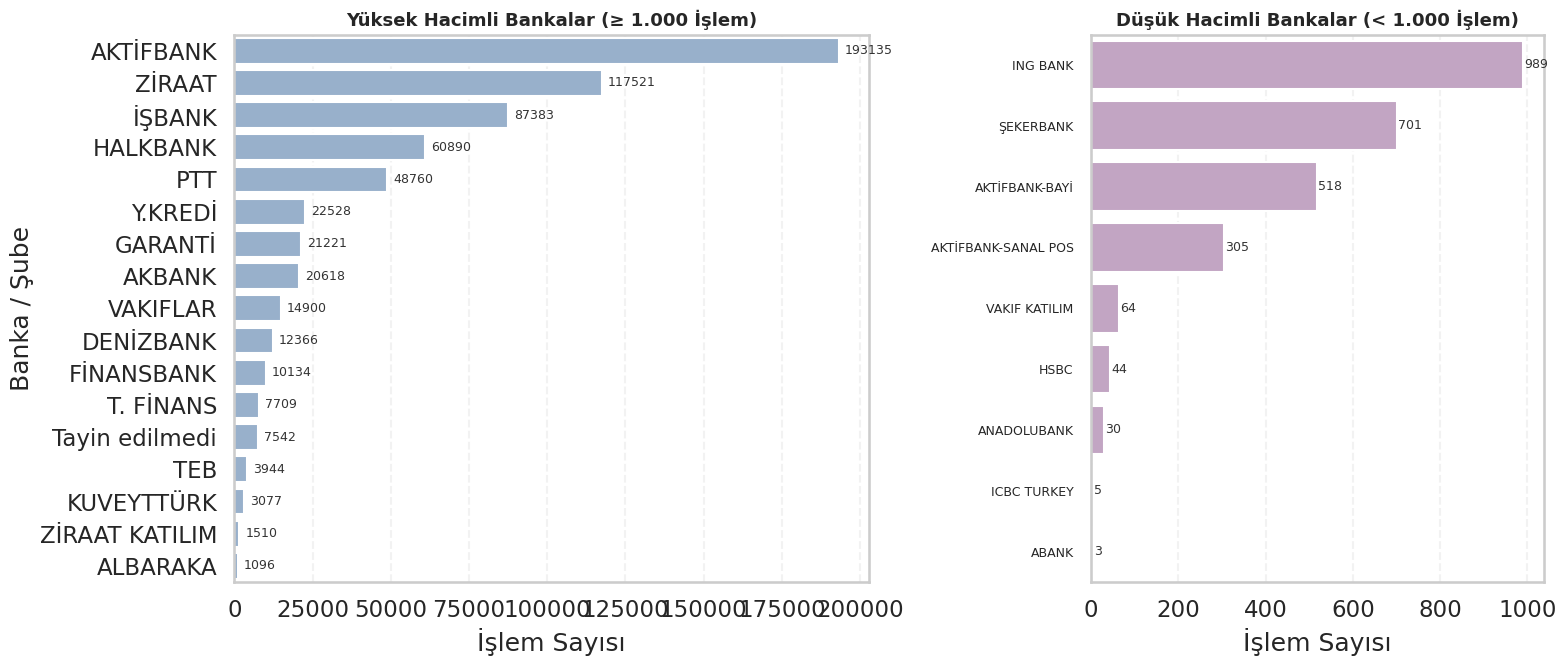

In [27]:
sube_counts = df_tahsilat["Şube"].value_counts()

high_volume = sube_counts[sube_counts >= 1000]
low_volume = sube_counts[sube_counts < 1000]

fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={"width_ratios": [1.4, 1]})

sns.barplot(
    y=high_volume.index,
    x=high_volume.values,
    ax=axes[0],
    color="#8FAFD4"
)

axes[0].set_title(
    "Yüksek Hacimli Bankalar (≥ 1.000 İşlem)",
    fontweight="bold",
    fontsize=13
)
axes[0].set_xlabel("İşlem Sayısı")
axes[0].set_ylabel("Banka / Şube")
axes[0].grid(axis="x", linestyle="--", alpha=0.25)

for i, value in enumerate(high_volume.values):
    axes[0].text(
        value + (high_volume.max() * 0.01), 
        i,
        f"{value}",
        va="center",
        fontsize=9,
        color="#333333"
    )

sns.barplot(
    y=low_volume.index,
    x=low_volume.values,
    ax=axes[1],
    color="#C7A0C8"
)

axes[1].set_title(
    "Düşük Hacimli Bankalar (< 1.000 İşlem)",
    fontweight="bold",
    fontsize=13
)
axes[1].set_xlabel("İşlem Sayısı")
axes[1].set_ylabel("")
axes[1].grid(axis="x", linestyle="--", alpha=0.25)
axes[1].tick_params(axis="y", labelsize=9)

for i, value in enumerate(low_volume.values):
    axes[1].text(
        value + 3,      
        i,
        str(value),
        va="center",
        fontsize=9,
        color="#333333"
    )

plt.tight_layout()
plt.show()

Bu ayrım, tahsilat süreçlerinin optimizasyonunda banka bazlı önceliklendirme yapılabileceğini göstermektedir.

**6.Zamanında / Geç Ödeme Oranları**

In [28]:
zamaninda_cols = ["Son Ödeme Tarihinden Önceki Tahsilat", "Son Ödeme Tarihindeki Tahsilat"]

gec_cols = ["Son Ödeme (1)", "Son Ödeme (2)", "Son Ödeme (3)", "Son Ödeme (4)", "Son Ödeme (5)", "Son Ödeme (6-10)", 
            "Son Ödeme (10-20)", "Son Ödeme (20-30)", "Son Ödeme (30-60)", "Son Ödeme (60-90)", "Son Ödeme (90-120)", 
            "Son Ödeme (120-150)", "Son Ödeme (150-180)", "Son Ödeme (180+)"]

df_tahsilat_1["odeme_durumu"] = np.where(
    df_tahsilat_1[zamaninda_cols].notna().any(axis=1),
    "Zamanında Ödeme",
    np.where(
        df_tahsilat_1[gec_cols].notna().any(axis=1),
        "Geç Ödeme",
        "Ödeme Yok"
    )
)

In [29]:
odeme_sayilari = df_tahsilat_1["odeme_durumu"].value_counts()
odeme_oranlari = odeme_sayilari / odeme_sayilari.sum()

odeme_sayilari, odeme_oranlari

(odeme_durumu
 Zamanında Ödeme    789588
 Geç Ödeme          126210
 Ödeme Yok            1834
 Name: count, dtype: int64,
 odeme_durumu
 Zamanında Ödeme    0.860463
 Geç Ödeme          0.137539
 Ödeme Yok          0.001999
 Name: count, dtype: float64)

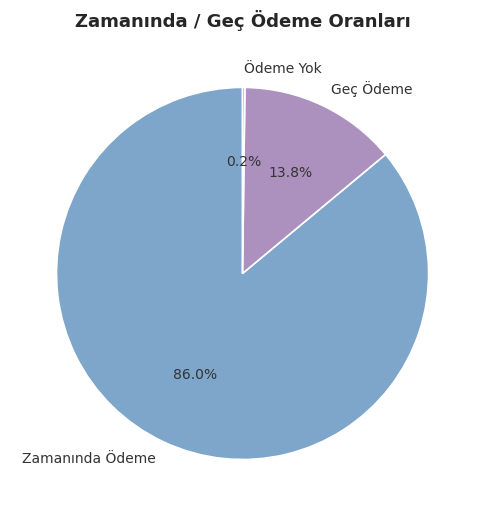

In [38]:
colors = ["#7EA5CA", "#AC91BF"]

plt.figure(figsize=(5.5, 5.5))

plt.pie(
    odeme_oranlari,
    labels=odeme_oranlari.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={
        "fontsize": 10,
        "color": "#333333"
    },
    wedgeprops={
        "edgecolor": "white",
        "linewidth": 1.2
    }
)

plt.title(
    "Zamanında / Geç Ödeme Oranları",
    fontsize=13,
    fontweight="bold",
    pad=10
)

plt.tight_layout()
save_fig("03_payment_status_distribution.png") 
plt.show()

Zamanında ödeme oranının baskın olması, tahsilat performansının genel olarak güçlü olduğunu göstermektedir.

**7.kWh Dağılımı & Outlier**

In [31]:
Q1 = df_tahakkuk_all["kwh"].quantile(0.25)
Q3 = df_tahakkuk_all["kwh"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_tahakkuk_all["is_outlier"] = (
    (df_tahakkuk_all["kwh"] < lower_bound) |
    (df_tahakkuk_all["kwh"] > upper_bound)
)

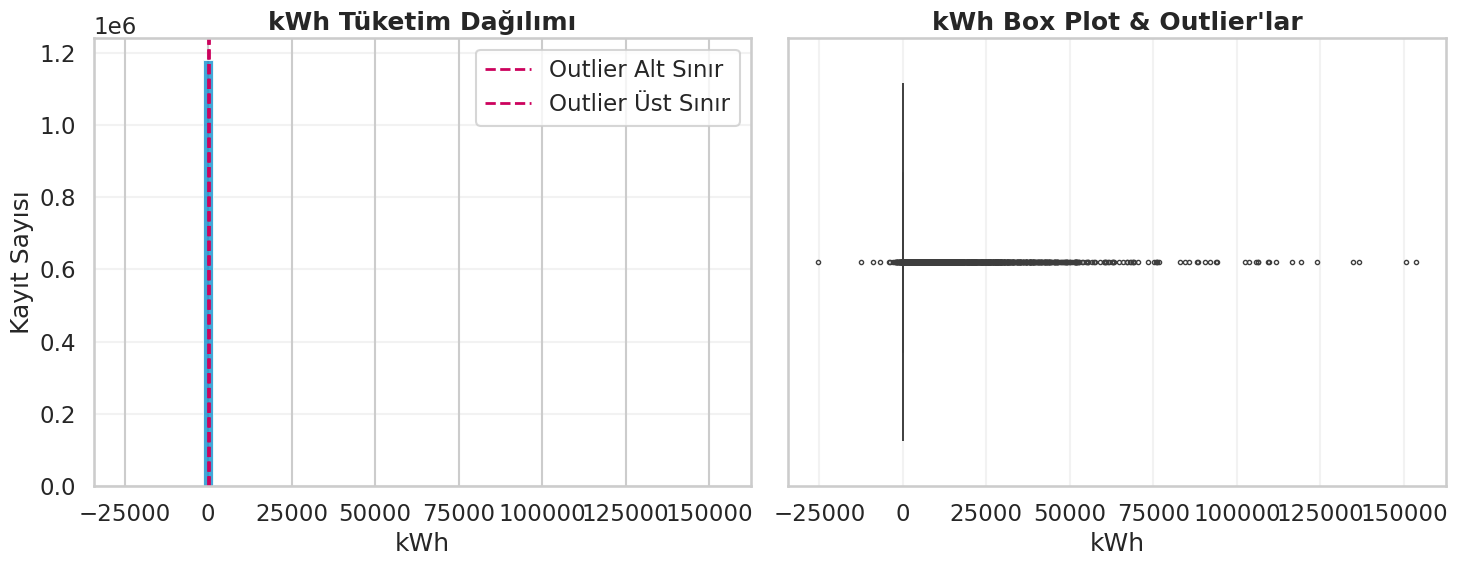

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(
    df_tahakkuk_all["kwh"],
    bins=60,
    ax=axes[0],
    color="#028ACC",
    edgecolor="white"
)

axes[0].axvline(lower_bound, color="#CC025D", linestyle="--", linewidth=2, label="Outlier Alt Sınır")
axes[0].axvline(upper_bound, color="#CC025D", linestyle="--", linewidth=2, label="Outlier Üst Sınır")

axes[0].set_title("kWh Tüketim Dağılımı", fontweight="bold")
axes[0].set_xlabel("kWh")
axes[0].set_ylabel("Kayıt Sayısı")
axes[0].legend()
axes[0].grid(axis="y", alpha=0.25)

sns.boxplot(
    x=df_tahakkuk_all["kwh"],
    ax=axes[1],
    color="#CC025D",
    fliersize=3,
    linewidth=1.2
)

axes[1].set_title("kWh Box Plot & Outlier'lar", fontweight="bold")
axes[1].set_xlabel("kWh")
axes[1].grid(axis="x", alpha=0.25)

plt.tight_layout()
plt.show()

kWh tüketim dağılımının sağa çarpık yapısı, az sayıdaki yüksek tüketim değerinin ortalama tüketimi yukarı çektiğini göstermektedir.

In [33]:
lower_bound_fixed = max(lower_bound, 0)

log_lower = np.log1p(lower_bound_fixed)
log_upper = np.log1p(upper_bound)

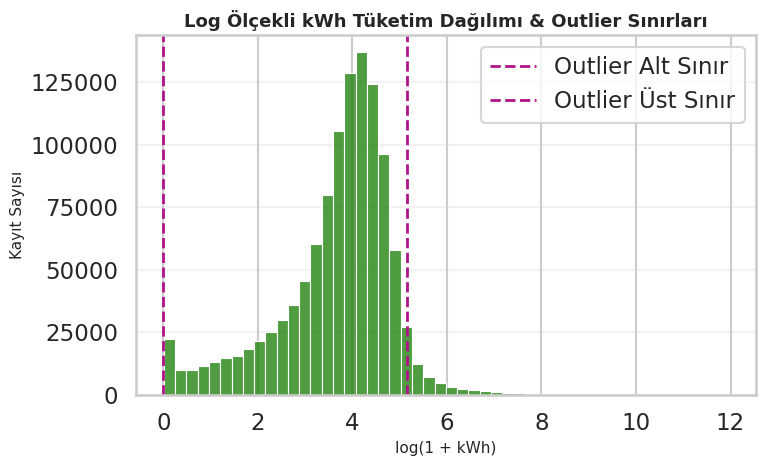

In [36]:
kwh_clean = df_tahakkuk_all["kwh"]
kwh_clean = kwh_clean[(kwh_clean > 0) & (~kwh_clean.isna())]

plt.figure(figsize=(8, 5))

sns.histplot(
    np.log1p(kwh_clean),
    bins=50,
    color="#157B01",
    edgecolor="white",
    linewidth=0.8
)

plt.axvline(
    log_lower,
    color="#B01389",
    linestyle="--",
    linewidth=2,
    label="Outlier Alt Sınır"
)

plt.axvline(
    log_upper,
    color="#B01389",
    linestyle="--",
    linewidth=2,
    label="Outlier Üst Sınır"
)

plt.title(
    "Log Ölçekli kWh Tüketim Dağılımı & Outlier Sınırları",
    fontsize=13,
    fontweight="bold"
)
plt.xlabel("log(1 + kWh)", fontsize=11)
plt.ylabel("Kayıt Sayısı", fontsize=11)

plt.legend()
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()

Logaritmik dönüşüm, sağa çarpık kWh dağılımını daha dengeli hale getirmiştir ve yüksek tüketim değerlerinin genel eğilim üzerindeki etkisini daha okunur hale getirmiştir.

**8.Genel Değerlendirme**

- Yapılan görselleştirmeler, enerji tüketimi ve ödeme davranışlarının tek tip bir yapı sergilemediğini; ilçe, müşteri profili ve zaman boyutuna bağlı olarak anlamlı biçimde farklılaştığını göstermektedir.

- Tüketim tarafında gözlemlenen dağılımsal asimetri ve mevsimsel etkiler, ortalama bazlı değerlendirmelerin tek başına yeterli olmadığını; uç değerler ve dönemsel değişimlerin dikkate alınması gerektiğini ortaya koymaktadır.

- Tahsilat tarafındaki farklılaşmalar ise, operasyonel ve finansal süreçlerin bölgesel dinamikler gözetilerek ele alınmasının önemine işaret etmektedir.